In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
detector=mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)
def detect_face(frame):
    bounding_boxes=[]
    results = detector.process(frame)
    if results.detections:
        height,width,_=frame.shape
        for detection in results.detections:
            bb=detection.location_data.relative_bounding_box
            x1=max(0,bb.xmin*width)
            y1=max(0,bb.ymin*height)
            x2=min(width,(bb.xmin+bb.width)*width)
            y2=min(height,(bb.ymin+bb.height)*height)
            bbox=np.array([x1,y1,x2,y2])
            bounding_boxes.append(bbox)

    return bounding_boxes

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
from hsemotion_onnx.facial_emotions import HSEmotionRecognizer
#model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name)

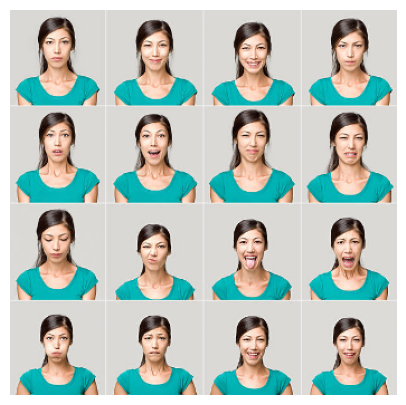

In [4]:
fpath='/home/siwon/dev/modedeung/data/testimage.png'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

Disgust [ 1.5044944   0.49989998  5.364338   -3.6314466  -0.2453259  -0.04859027
  0.39859825 -4.717808  ]
Anger [ 4.0908203   0.69293106 -0.42540616 -0.15594748 -2.126739    2.7636209
  1.6400745  -1.0125157 ]
Surprise [-1.6126804  -0.8401117  -1.6505705   1.9372661   2.5264328   0.24934304
 -1.6378537   4.6979017 ]
Happiness [-1.2017676  -4.1931486  -0.10648558  1.586336    2.4038363  -2.1587853
 -1.7672533   0.37784886]
Disgust [ 0.17756161 -3.8440275   7.398895    1.8257147  -2.835259   -1.8486217
  1.4865493  -3.3852925 ]
Neutral [ 2.178544    0.32916483 -1.3885217  -0.09859827 -1.8859594   3.5557413
  1.8161434   1.3267574 ]
Happiness [-3.1413822  -1.087134   -0.11157228 -0.3991965   1.8157239  -1.3778177
  1.0485928  -1.587942  ]
Fear [ 1.0544099  -4.6489887   2.264558    4.7937965  -2.9401665  -1.5672009
  2.351974    0.11606273]
Disgust [ 2.7027407   2.4170108   4.768682   -3.8908572  -1.567592    0.53019077
 -0.557361   -2.732635  ]
Fear [-1.3783985  -1.8257409   0.40579814  

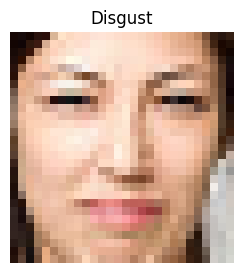

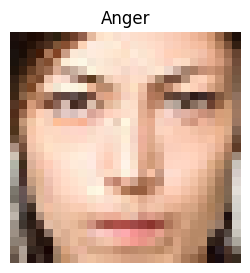

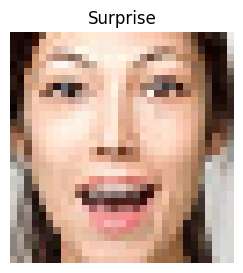

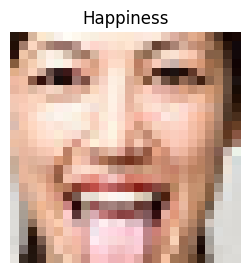

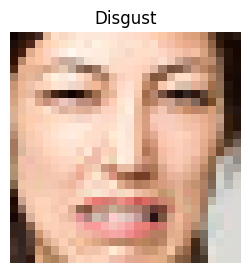

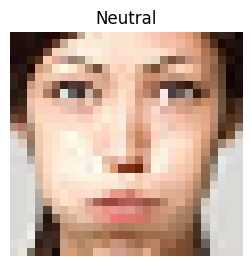

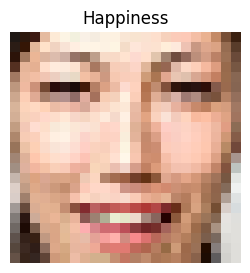

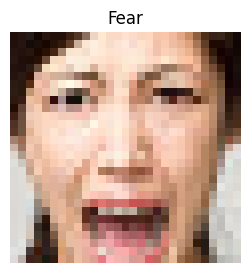

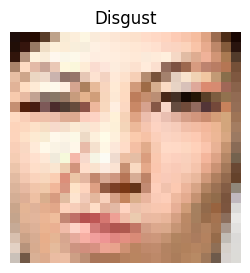

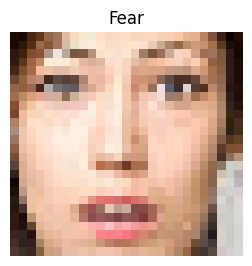

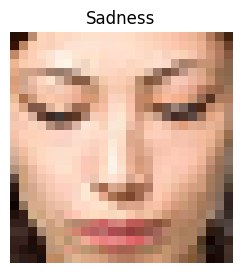

In [5]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

['Disgust', 'Anger', 'Surprise', 'Happiness', 'Disgust', 'Neutral', 'Happiness', 'Fear', 'Disgust', 'Fear', 'Sadness'] [[2.01823264e-02 7.39062857e-03 9.57811296e-01 1.18702614e-04
  3.50779179e-03 4.27046465e-03 6.67861756e-03 4.00552744e-05]
 [7.05117583e-01 2.35818066e-02 7.70707149e-03 1.00905215e-02
  1.40607927e-03 1.87010556e-01 6.08017631e-02 4.28460632e-03]
 [1.51638326e-03 3.28345667e-03 1.46000262e-03 5.27875163e-02
  9.51487347e-02 9.76057537e-03 1.47868763e-03 8.34564686e-01]
 [1.58983711e-02 7.98384892e-04 4.75365371e-02 2.58351266e-01
  5.85121989e-01 6.10555429e-03 9.03161056e-03 7.71562830e-02]
 [7.25458201e-04 1.30034514e-05 9.92653131e-01 3.77047528e-03
  3.56583259e-05 9.56427612e-05 2.68595386e-03 2.05723791e-05]
 [1.56451598e-01 2.46152766e-02 4.41797217e-03 1.60483215e-02
  2.68650986e-03 6.20139122e-01 1.08890839e-01 6.67503774e-02]
 [3.79105308e-03 2.95739006e-02 7.84494057e-02 5.88404462e-02
  5.39018571e-01 2.21139472e-02 2.50289679e-01 1.79229863e-02]
 [1.97

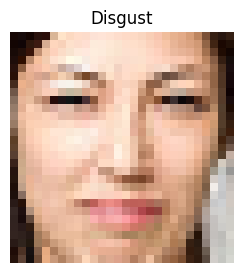

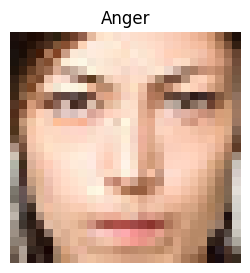

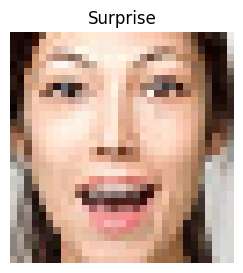

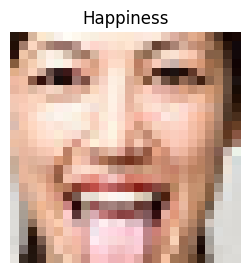

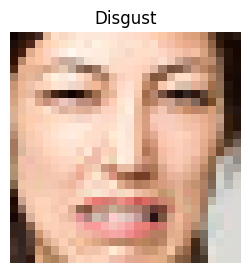

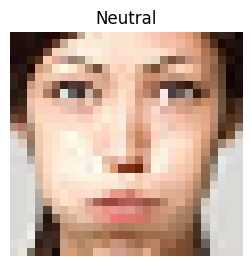

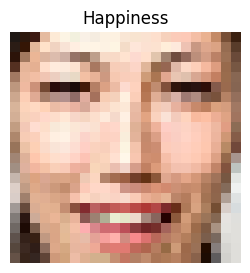

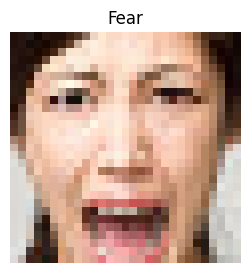

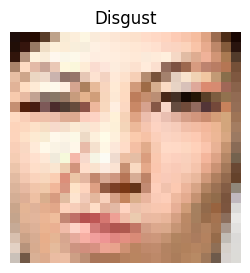

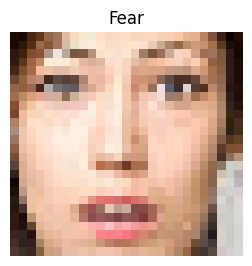

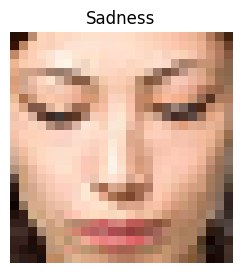

In [6]:
face_img_list=[]
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)